**Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.


**Company wants to know**


1.   Which variables are significant in predicting the price of a car
2.   How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

**Business Goal**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


In [1]:
# Import Packages
import pandas as pd              # Data Analysis package
import numpy as np               
import matplotlib.pyplot as plt  # Data Virtualization package
%matplotlib inline 
import seaborn as sns            # Data Virtualization package
import warnings                  # Supress Warnings
warnings.filterwarnings('ignore')

**Step 1 : Reading and Understanding the dataset**

In [2]:
# Create dataframe by reading the car price dataset
car_details = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# Read the first 5 observations from the dataframe
car_details.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Print the shape of the car_details dataframe
car_details.shape

(205, 26)

We have 205 observations in car_details dataframe. Let's describe it.

In [5]:
# Describe car_details dataframe
car_details.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Get the detailed information
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

**Step 2 : Data Cleaning and Preparation**

In [7]:
# Split the company name from CarName variable
companyname = car_details['CarName'].apply(lambda name : name.split(' ')[0])

In [8]:
# Dropping the CarName variable as it is not needed
car_details.drop(columns = {'CarName'}, axis = 1, inplace = True)

In [9]:
# Adding the companyname as a new variable
car_details.insert(loc = 3, column = 'companyname', value = companyname)

In [10]:
# Get the list of first 5 observations
car_details.head()

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Check the unique values in companyname variable
car_details['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

From the above result, we have spelling mistakes in the companyname variable. The following list shows the words which has spelling mistakes. Words in bold is the correct spelling.


1.   **volkswagen** = vokswagen, vw
2.   **mazda** = maxda
3.   **porsche** = porcshce
4.   **toyota** = toyouta




In [12]:
# Convert the data into lowercase
car_details['companyname'] = car_details['companyname'].str.lower()

In [13]:
# Define a function to rename the spelling mistakes
def renameCompanyName(error_data, correct_data):
  car_details['companyname'].replace(error_data, correct_data, inplace = True)

In [14]:
# Call renameCompanyName function
renameCompanyName('vw','volkswagen')
renameCompanyName('vokswagen','volkswagen')
renameCompanyName('maxda','mazda')
renameCompanyName('porcshce','porsche')
renameCompanyName('toyouta','toyota')

In [15]:
# Check the unique values in companyname variable
car_details['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
# Checking for duplicate values in car_details dataframe
car_details.loc[car_details.duplicated()]

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


As a result, there is no duplicated values.

**Step 3 : Data Visualization**

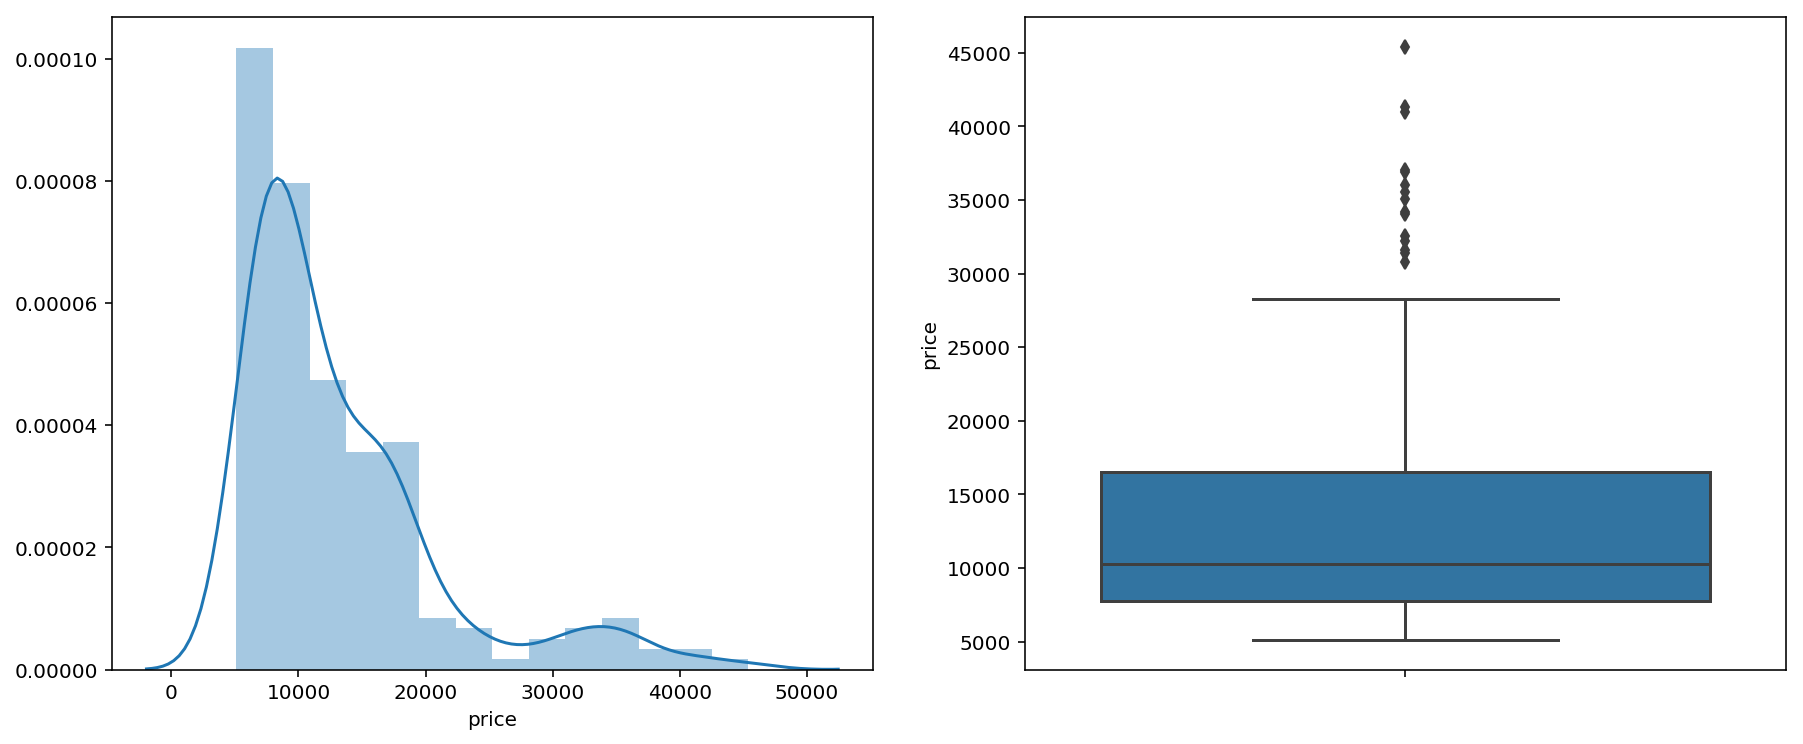

In [17]:
# Let's understand the price of the car
plt.figure(figsize=(15,6)) # Set width and height for the plots

plt.subplot(1,2,1) # Set the rows, columns and their indexing position
sns.distplot(a = car_details.price)

plt.subplot(1,2,2) # Set the rows, columns and their indexing position
sns.boxplot(y = car_details.price)

From the distribution plot, we can see that there is right skewed and most of the car prices are below 20000.

In the box plot, there are outliers which shows some of the car prices are significantly higher.

In [18]:
# Let's see the mean, median and other percentile for the car prices
car_details.price.describe(percentiles = [0.25, 0.5, 0.75, 0.85, 0.95, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64



*   There is a significance difference between mean and median of the car prices.
*   There is a high variance in the car prices whereas 85 % of the car prices falls within 18500 and the remaining 15% ranges between 18500 and 45400.



**Virtualize the categorical variables**

[Text(0,0.5,'Frequency of fuel type'), Text(0.5,0,'Fuel Type')]

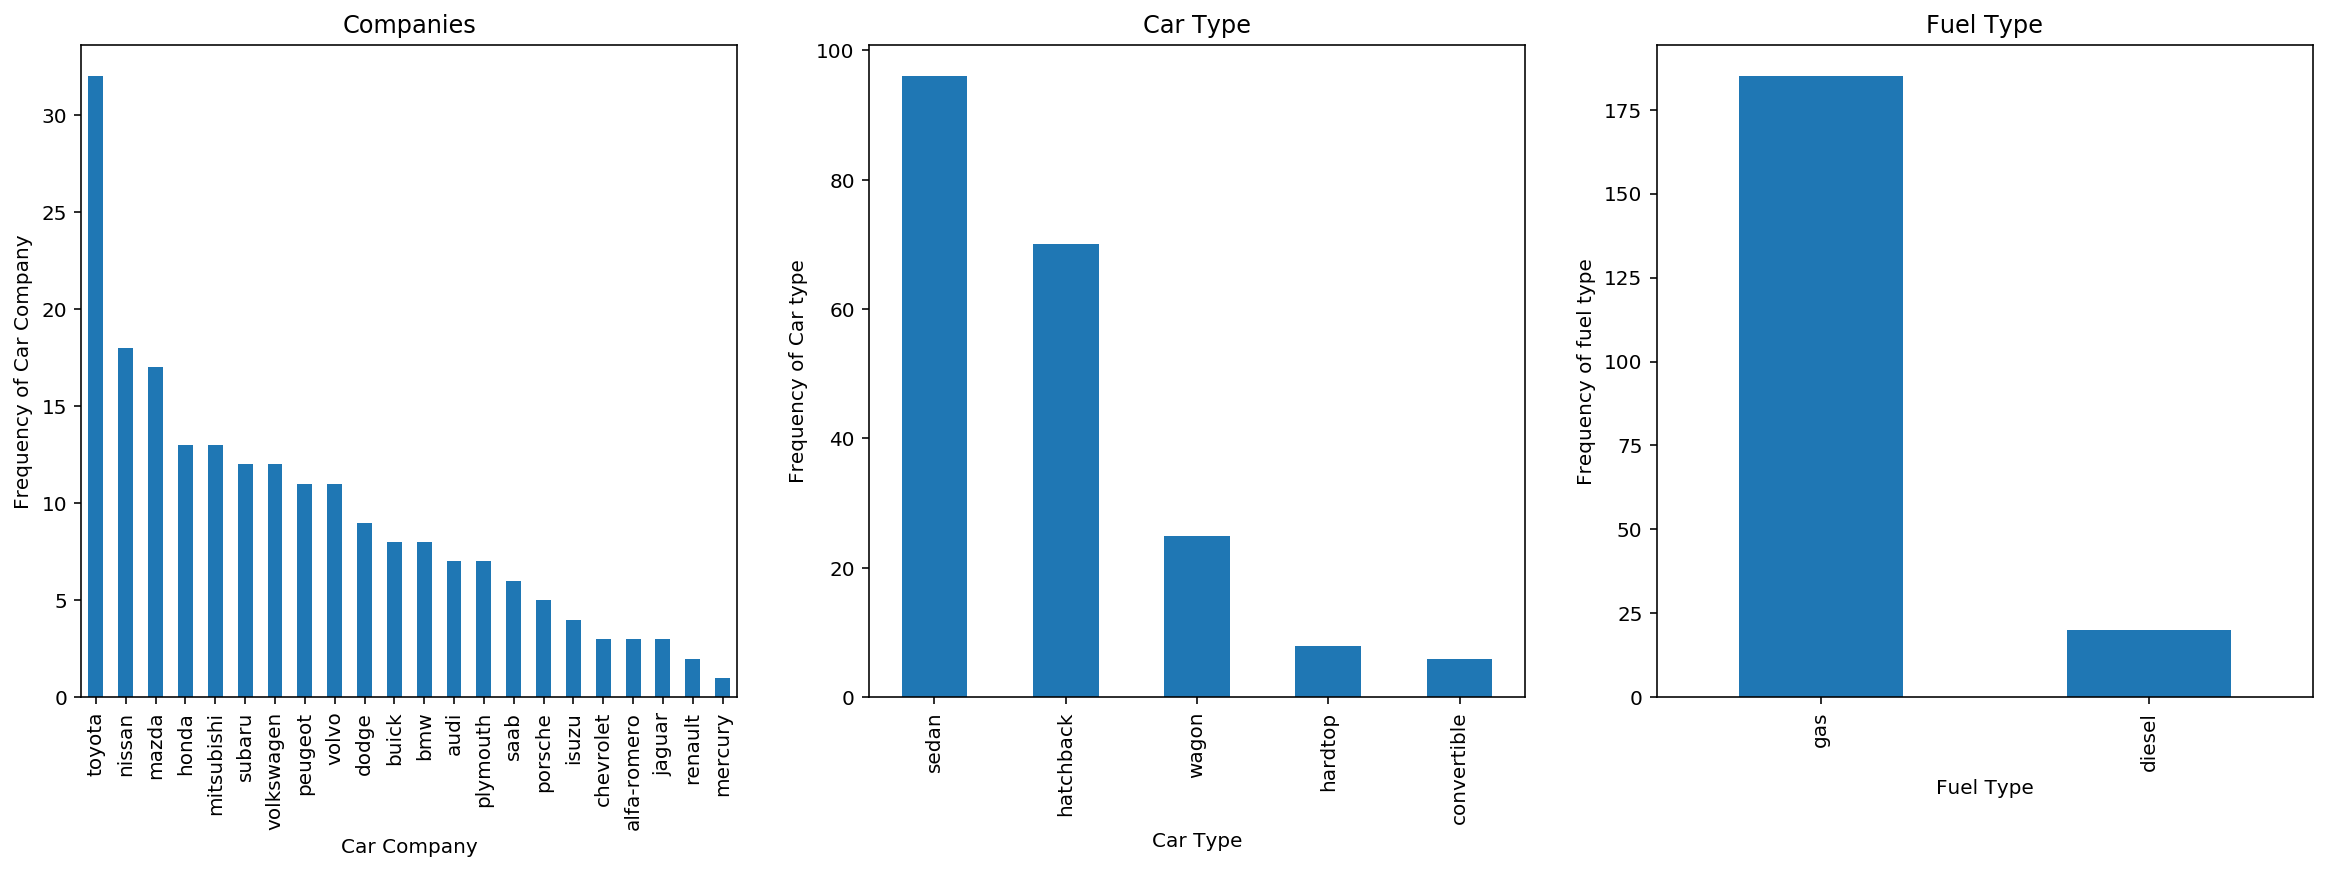

In [19]:
# Let's virtualize the car companies, car types and fuel types
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt1 = car_details.companyname.value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car Company', ylabel='Frequency of Car Company')

plt.subplot(1,3,2)
plt1 = car_details.carbody.value_counts().plot('bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.subplot(1,3,3)
plt1 = car_details.fueltype.value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

**toyota** is the most favored car company.

**sedan** is the car type being used by most of the car companies.

**gas** is used mostly than diesel


[Text(0,0.5,'Frequency of Engine Type'), Text(0.5,0,'Engine Type')]

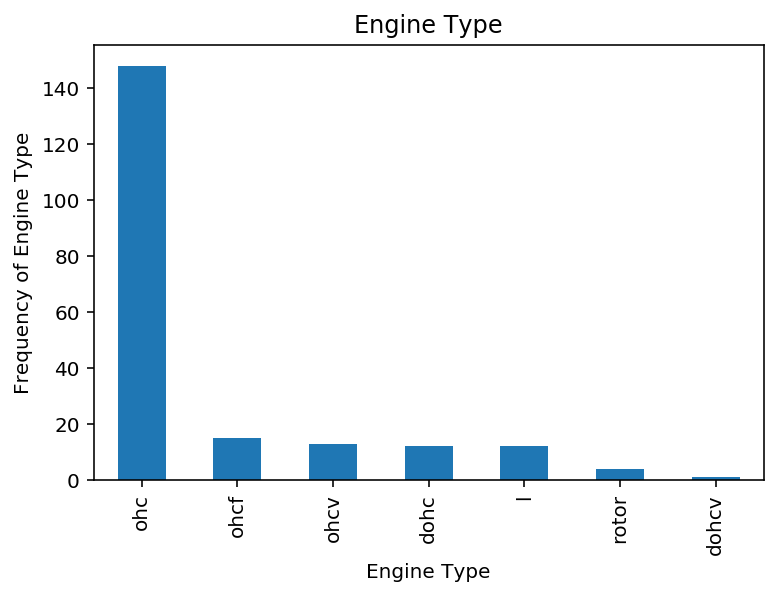

In [20]:
# Let's virutalize the engine types
plt1 = car_details.enginetype.value_counts().plot('bar')
plt.title('Engine Type')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine Type')

**dhc** is the most favored engine type for the car companies

Let's compare the average prices for car companies and engine type.

[Text(0,0.5,'Average Price'), Text(0.5,0,'Fuel Type')]

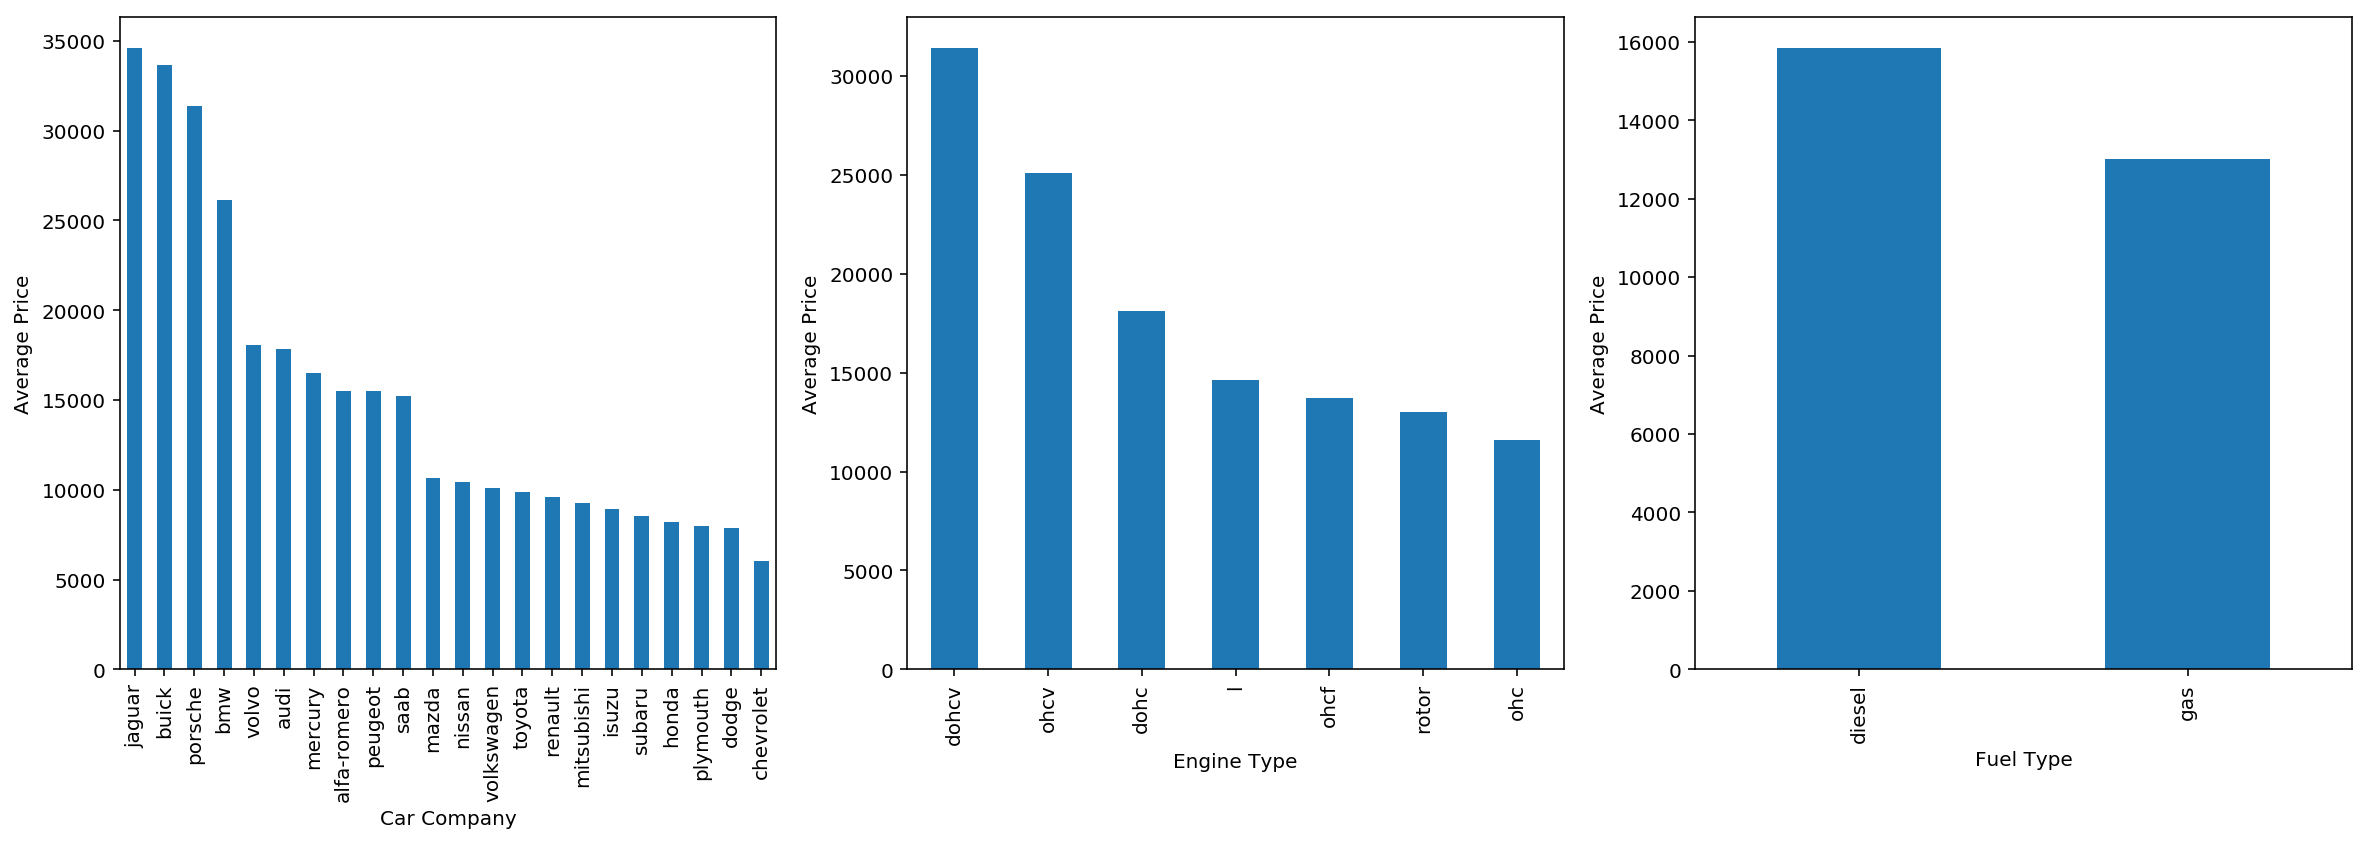

In [21]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt1 = car_details.groupby('companyname')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Car Company', ylabel = 'Average Price')

plt.subplot(1,3,2)
plt1 = car_details.groupby('enginetype')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Type', ylabel = 'Average Price')

plt.subplot(1,3,3)
plt1 = car_details.groupby('fueltype')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Fuel Type', ylabel = 'Average Price')

**jaguar, buick, porsche, bmw, volvo** are the top 5 car companies having higher average price.

**dohcv** is the most favored engine type.

**diesel** has the highest average prices than **gas**. Most of the car companies preferred **gas**
as their fuel type.

[Text(0,0.5,'Average Price'), Text(0.5,0,'Engine Location')]

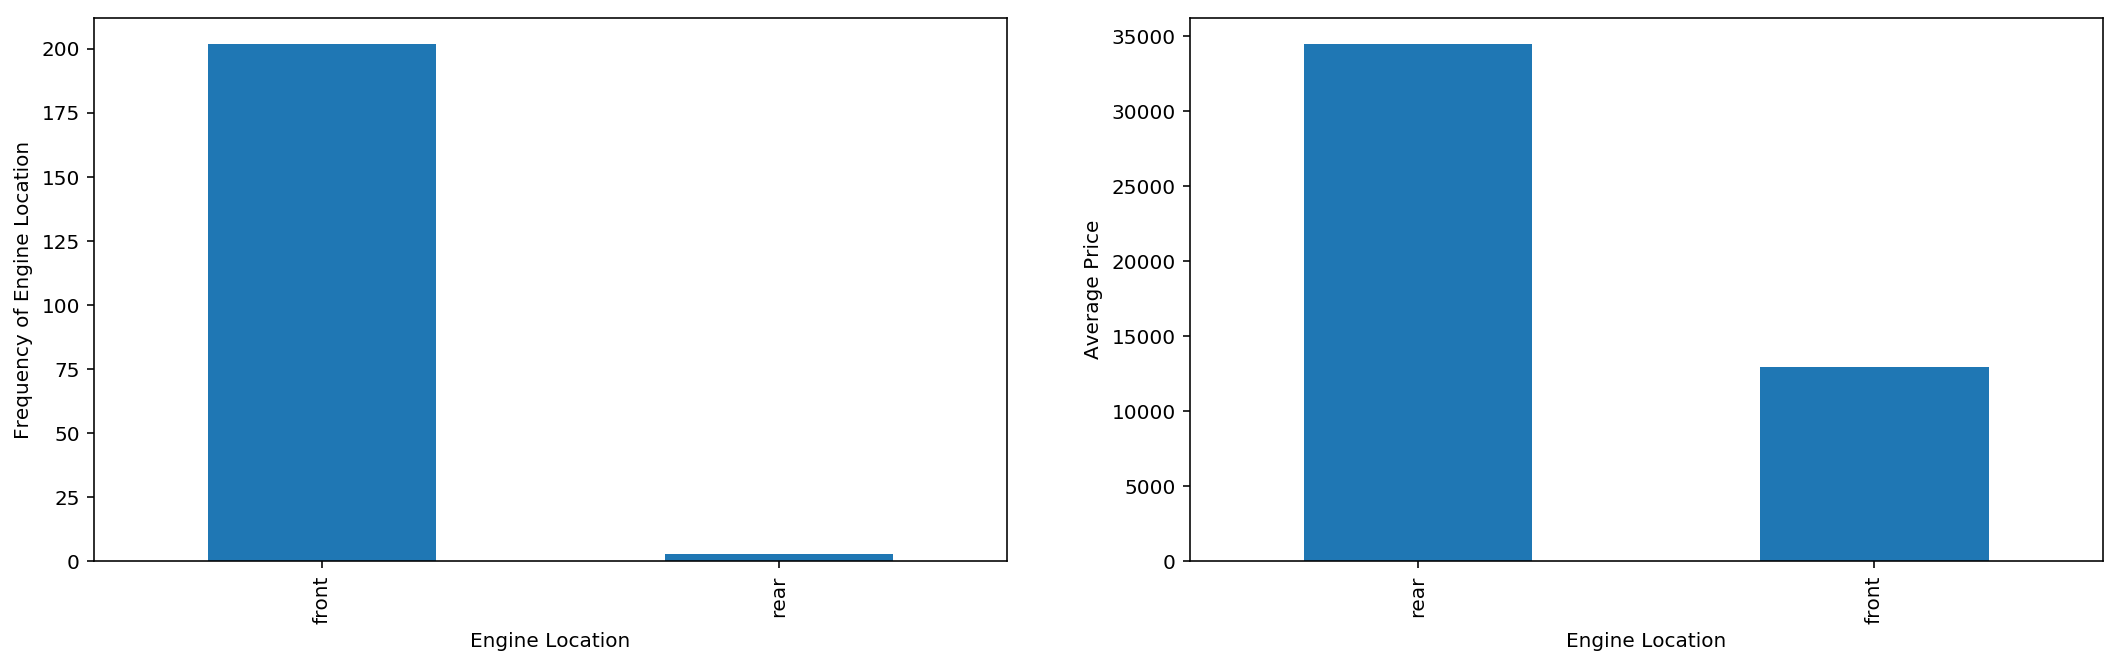

In [22]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt1 = car_details.enginelocation.value_counts().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Location', ylabel = 'Frequency of Engine Location')

plt.subplot(1,2,2)
plt1 = car_details.groupby('enginelocation')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Location', ylabel = 'Average Price')

**front** is the most favored engine location used by most of the car companies.
**rear** has the highest average price then **front**.

**Step 4 : Extracting new features**

In [23]:
# Calculating the fuel economy by using highwaympg and citympg
car_details['fueleconomy'] = (0.45 * car_details['highwaympg']) + (0.55 * car_details['citympg'])

In [24]:
# Calculating the stroke ratio by using boreratio and stroke
car_details['strokeratio'] = car_details['boreratio'] / car_details['stroke']

In [25]:
# Categorizing the car companies based on average car price
car_details['price'] = car_details['price'].astype('int')
temp1 = car_details.copy()
temp2 = temp1.groupby('companyname')['price'].mean()
temp1 = temp1.merge(temp2.reset_index(), how = 'left', on = 'companyname')
bins = [0, 10000, 20000, 40000]
cars_bins = ['Low', 'Medium', 'High']
car_details['carsrange'] = pd.cut(temp1['price_y'], bins, right = False, labels = cars_bins)

Text(0,0.5,'Price')

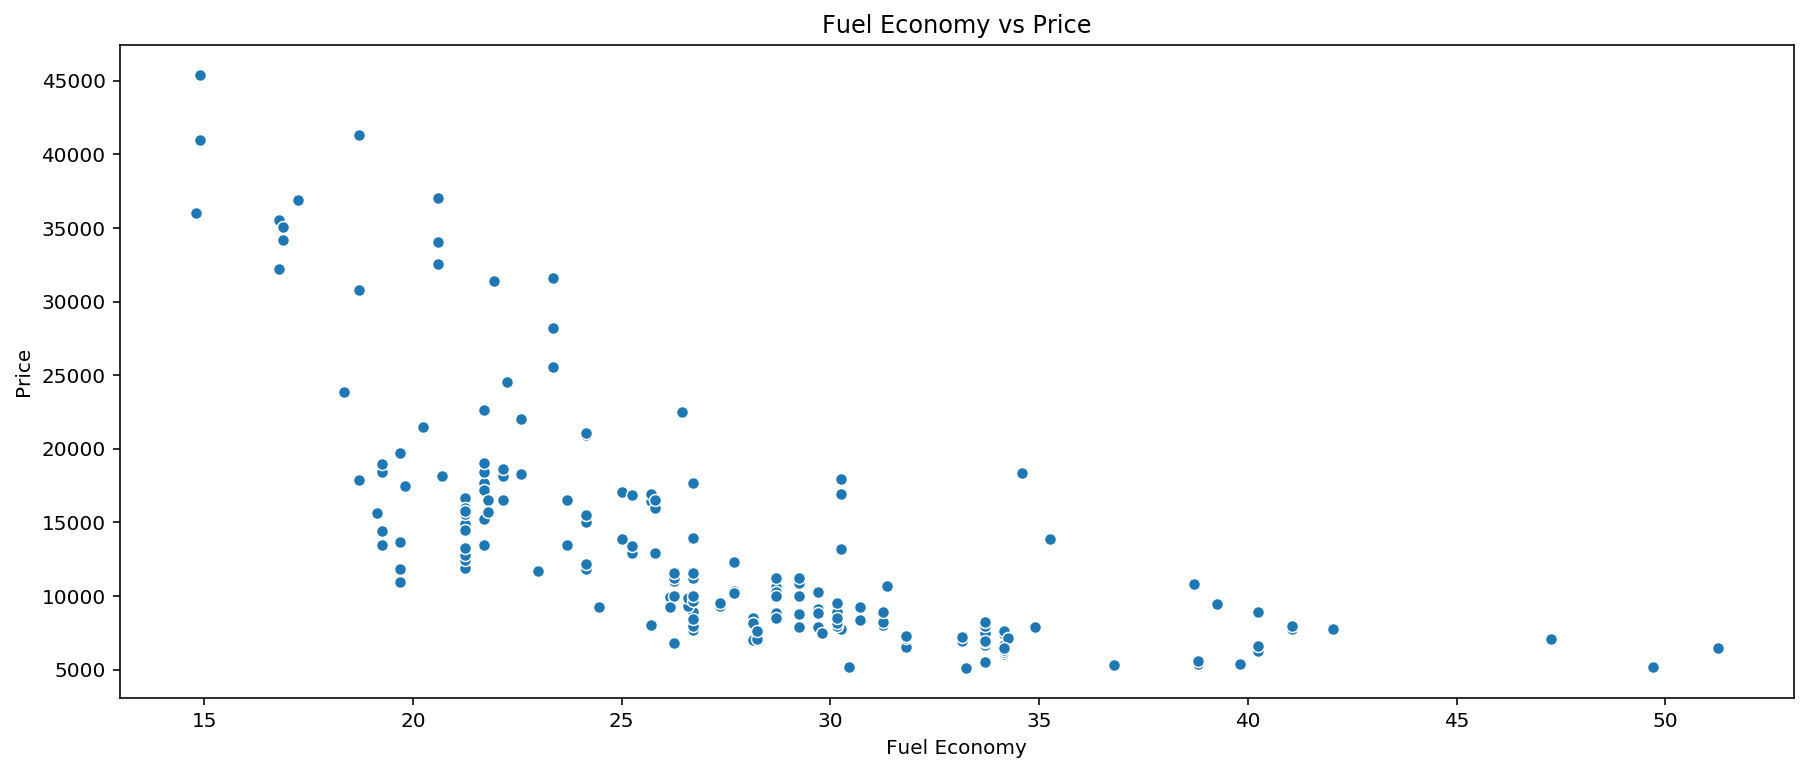

In [26]:
plt.figure(figsize = (15,6))
plt.title('Fuel Economy vs Price')
sns.scatterplot(x = car_details['fueleconomy'], y = car_details['price'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

There is a negative correlation between fuel economy and price and it is significant

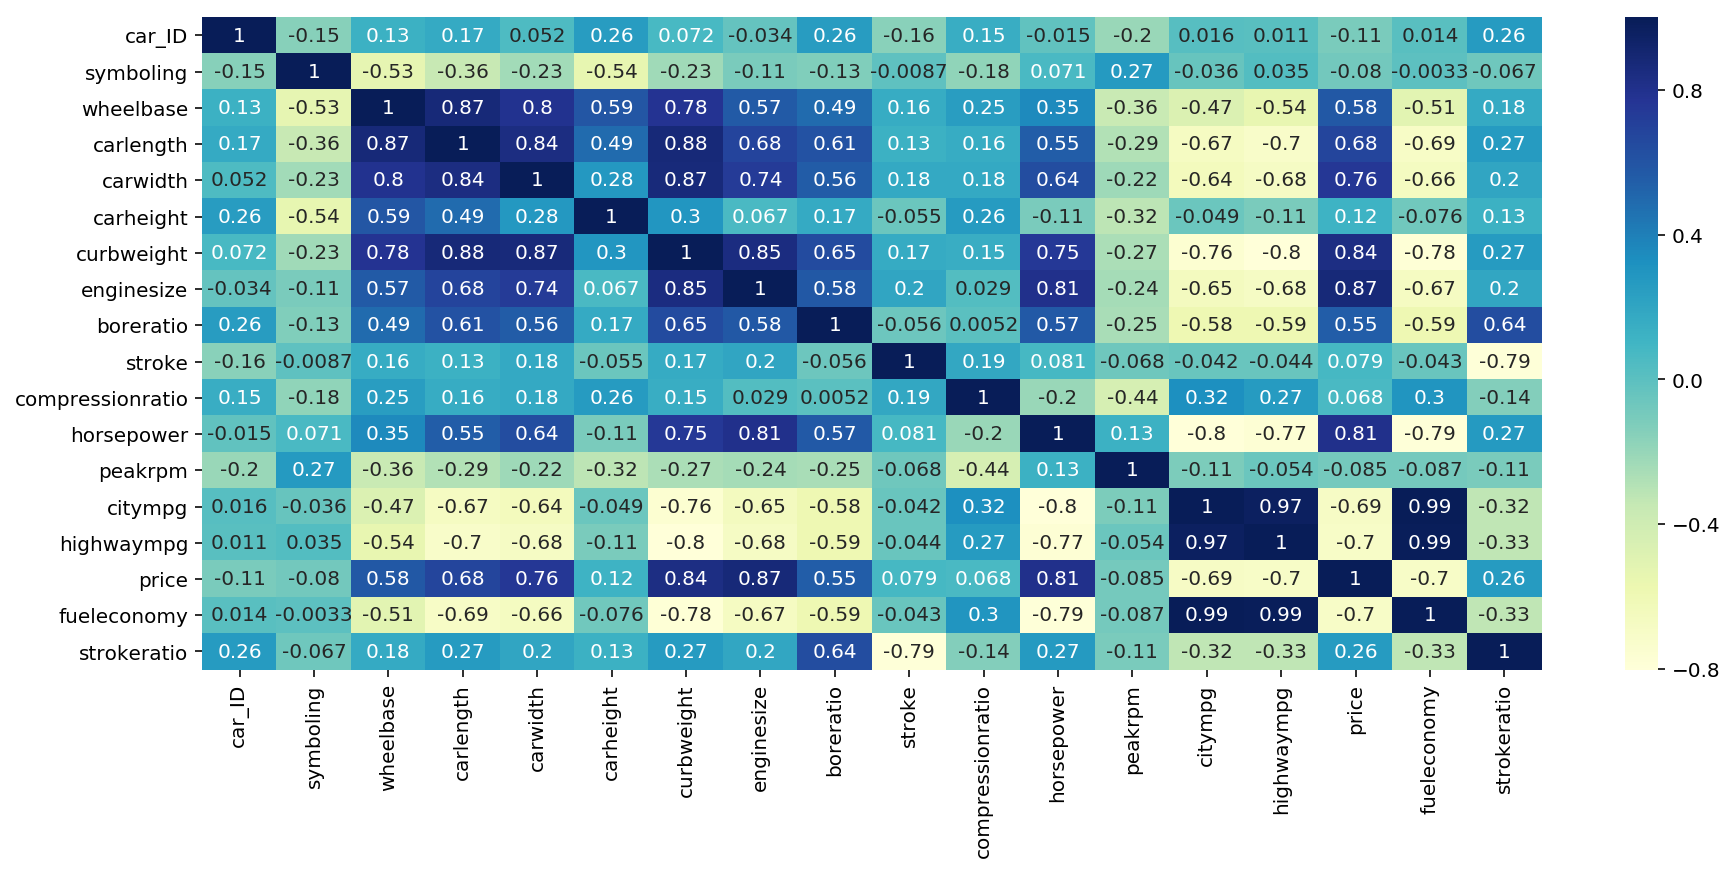

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(car_details.corr(), annot = True, cmap='YlGnBu')


price has high correlation for the list of features


*   carlength = 0.68
*   carwidth = 0.76
*   curbweight = 0.84
*   enginesize = 0.87
*   horsepower = 0.81



**Step 5 : Dummy Variables**

In [28]:
categorical_variables = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                       'enginetype', 'cylindernumber', 'fuelsystem', 'carsrange']

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df= pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
  
for variable in categorical_variables:
   car_details = dummies(variable, car_details)


In [29]:
car_details.shape

(205, 54)

In [30]:
car_details.head()

,car_ID,companyname,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,1,0
1,2,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,1,0
2,3,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,1,0,0,1,0
3,4,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
4,5,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0


In [31]:
#Removing car_ID and companyname as it is not required for model building
car_details.drop(columns =['car_ID','companyname'], inplace = True)

In [32]:
car_details.shape

(205, 52)

**Step 6 : Test Train Data Split and Feature Scaling**

In [33]:
# Importing train_test_split to train the data for model building
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_details, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
# Use MinMaxScaler to apply scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueleconomy', 'strokeratio', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.412587,0.118881
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


In [36]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,1,0,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,1,0,0,1,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,1,0,0,1,0


In [37]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

**Step 7 : Model Building**

In [38]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 24),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 7),
 ('stroke', False, 8),
 ('compressionratio', False, 37),
 ('horsepower', True, 1),
 ('peakrpm', False, 12),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('fueleconomy', False, 5),
 ('strokeratio', False, 16),
 (-1, False, 21),
 (0, False, 20),
 (1, False, 19),
 (2, False, 18),
 (3, False, 22),
 ('gas', False, 13),
 ('turbo', False, 26),
 ('two', False, 40),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', False, 2),
 ('wagon', True, 1),
 ('fwd', False, 28),
 ('rwd', False, 38),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 29),
 ('ohc', False, 11),
 ('ohcf', False, 14),
 ('ohcv', False, 17),
 ('rotor', False, 10),
 ('five', False, 36),
 ('four', False, 15),
 ('six', False, 32),
 ('three', True, 1),
 ('twelve', False, 3),
 ('two', False, 6),
 ('2bbl', False, 33),
 ('4bbl', False,

In [41]:
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'horsepower', 'hardtop', 'hatchback', 'wagon',
       'rear', 'dohcv', 'three', 'High'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [42]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,horsepower,hardtop,hatchback,wagon,rear,dohcv,three,High
122,0.291667,0.272692,0.083333,0,0,0,0,0,0,0
125,0.666667,0.500388,0.395833,0,1,0,0,0,0,1
166,0.308333,0.314973,0.266667,0,1,0,0,0,0,0
1,0.316667,0.411171,0.262500,0,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0,0,1,0,0,0,0


In [43]:
def buildModel(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**MODEL I**

In [44]:
X_train_new = buildModel(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.21e-70
Time:                        06:13:02   Log-Likelihood:                 205.92
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     132   BIC:                            -357.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1028      0.017     -5.968      0.0

**hardtop** has high p-value and dropping it.

In [45]:
X_train_new = X_train_new.drop(['hardtop'], axis = 1)

**MODEL II**

In [46]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.14e-72
Time:                        06:13:07   Log-Likelihood:                 205.83
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     133   BIC:                            -362.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1039      0.017     -6.112      0.0

All the features has p-value less than 0.05. Let's check VIF.

In [47]:
vif_df = X_train_new.drop(['const'], axis = 1)

In [48]:
checkVIF(vif_df)

,Features,VIF
1,curbweight,39.51
0,carwidth,24.96
2,horsepower,11.50
8,High,1.87
3,hatchback,1.63
6,dohcv,1.47
4,wagon,1.41
5,rear,1.20
7,three,1.03


**curbweight** has high VIF and dropping it.

In [49]:
X_train_new = X_train_new.drop(['curbweight'], axis = 1)

**MODEL III**

In [50]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.87e-69
Time:                        06:13:15   Log-Likelihood:                 196.43
No. Observations:                 143   AIC:                            -374.9
Df Residuals:                     134   BIC:                            -348.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1082      0.018     -5.993      0.0

**wagon** has p-value and dropping this feature.

In [51]:
X_train_new = X_train_new.drop(['wagon'], axis = 1)

**MODEL IV**

In [52]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.22e-70
Time:                        06:13:18   Log-Likelihood:                 195.88
No. Observations:                 143   AIC:                            -375.8
Df Residuals:                     135   BIC:                            -352.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1117      0.018     -6.308      0.0

All the features has good p-value and let's look for VIF.

In [53]:
vif_df = X_train_new.drop(['const'], axis = 1)

In [54]:
checkVIF(vif_df)

,Features,VIF
1,horsepower,7.51
0,carwidth,6.29
6,High,1.70
2,hatchback,1.45
4,dohcv,1.20
3,rear,1.17
5,three,1.03


**horsepower** has high VIF and dropping it.

In [55]:
X_train_new = X_train_new.drop(['horsepower'], axis = 1)

**MODEL V**

In [56]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     150.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.63e-57
Time:                        06:13:24   Log-Likelihood:                 162.34
No. Observations:                 143   AIC:                            -310.7
Df Residuals:                     136   BIC:                            -289.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1306      0.022     -5.894      0.0

Dropping **hatchback**. Hence it has high p-value.

In [57]:
X_train_new = X_train_new.drop(['hatchback'], axis = 1)

**MODEL VI**

In [58]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.80e-58
Time:                        06:13:28   Log-Likelihood:                 161.87
No. Observations:                 143   AIC:                            -311.7
Df Residuals:                     137   BIC:                            -294.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1390      0.020     -6.843      0.0

Dropping **three** and it has high p-value.

In [59]:
X_train_new = X_train_new.drop(['three'], axis = 1)

**MODEL VII**

In [60]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     221.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.71e-59
Time:                        06:13:32   Log-Likelihood:                 160.37
No. Observations:                 143   AIC:                            -310.7
Df Residuals:                     138   BIC:                            -295.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1304      0.020     -6.583      0.0

**dohcv** has high p-value and hence dropping it.

In [61]:
X_train_new = X_train_new.drop(['dohcv'], axis = 1)

**MODEL VIII**

In [62]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     291.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.90e-60
Time:                        06:13:35   Log-Likelihood:                 158.96
No. Observations:                 143   AIC:                            -309.9
Df Residuals:                     139   BIC:                            -298.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1259      0.020     -6.375      0.0

All the features has good p-value and check for VIF.

In [63]:
vif_df = X_train_new.drop(['const'], axis = 1)

In [64]:
checkVIF(vif_df)

,Features,VIF
2,High,1.40
0,carwidth,1.33
1,rear,1.07


Features **High, carwidth** and **rear** has good p-value and good VIF.

High represents the car companies which has high average car price.

carwidth represents the width of the car.

rear represents the engine location.

**Residual Analysis of Model**

In [65]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5,0,'Errors')

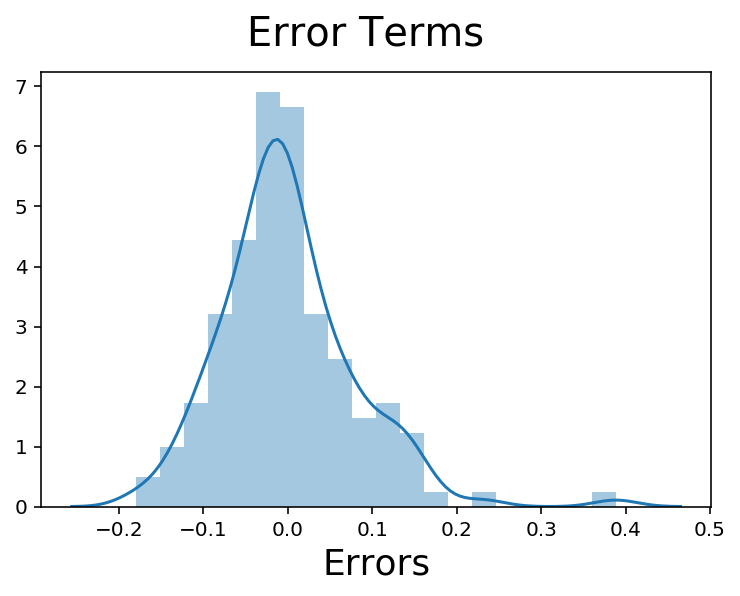

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

Error terms seem to be normally distributed, so the assumption on the linear modeling seems to be fulfilled.

**Step 9 : Prediction and Evaluation**

In [67]:
# Scaling the test data
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueleconomy', 'strokeratio', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [68]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [69]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [70]:
# Making predictions
y_pred = lm.predict(X_test_new)

Evaluation of test data

In [71]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8335910335897068

In [72]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     291.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.90e-60
Time:                        06:13:54   Log-Likelihood:                 158.96
No. Observations:                 143   AIC:                            -309.9
Df Residuals:                     139   BIC:                            -298.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1259      0.020     -6.375      0.0

Text(0,0.5,'y_pred')

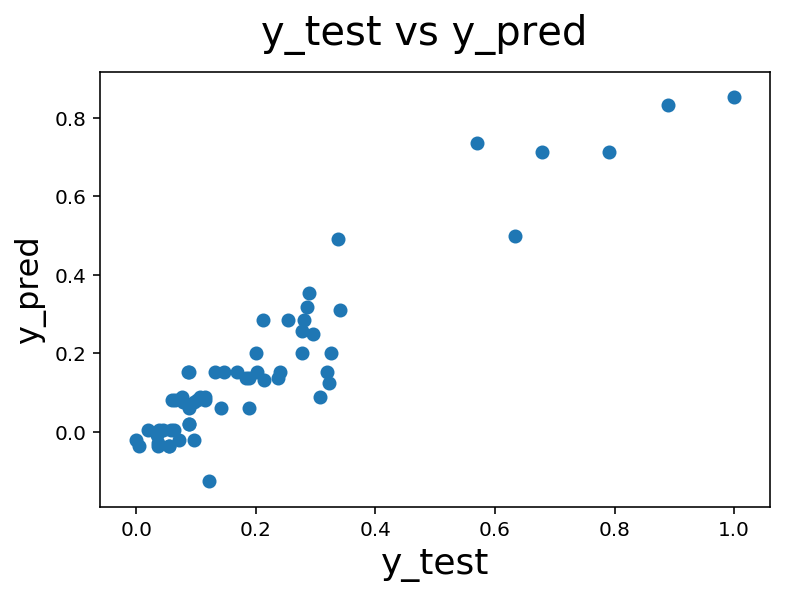

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

For test data and train data, R-squrared values are 0.83 and 0.86 respectively.

Adjusted R-squared value for train data is 0.86.

p-values for all the features has less than 0.05 and it is statistically significant.

Hence, 86% of variance explained. Prob (F-statistic) has 9.90e-60 (approx. 0.0) - Model fit is significant.